   
  <h1><center><span style = "color:#649F9F;">Titanic Data Set</span></center></h1>
  
  ***********

<h3>Background on the Titanic disaster</h3>

On April 14, 1912, The RSM Titanic struck an iceburg and sunk. By 2 am on the 15th, the ship had completely disappeared beneath the Atlantic Ocean.  Of the 2223 people abord the ship, more than 1500 passengers and crew members lost their lives. Contributing to this tragedy is that many lives were lost needlessly. The ship was equipped to carry **64 lifeboats, each with a capacity of 65 people.** Instead, the RSM Titanic made her maiden voyage with only 20 lifeboats. Even still, the 20 lifeboats could have saved more than half of the passengers and crew, but like the first lifeboat which carried only 28 people, they were not filled to capacity. This resulted in **only 31.6 percent of those on board surviving.** 

The wreckage now covers approximately **1,000 acres ** of the ocean bed.

<p>  
![Titanic Sketch](http://www.icyousee.org/graphics/titanicsketch.jpg)
<p>  

source: 
+ http://www.titanicfacts.net/
+ http://www.icyousee.org/titanic.html#serv


### Investigate a Dataset

The purpose of this analysis is to predict the factors (variables) that increased the survivability on the Titanic. I hypothesize that sex, socio-economic status and age will all play a factor a passenger’s survivability.  The data set is not a complete representation of the passengers on the Titanic but I will test if it is a good sample. Also, there is missing data. Due to this, the findings will be tentative, at best. A more complete data set is necessary to report more conclusively on survivability. 


**************
Data Dictionary

Variable	Definition	Key

survival-	Survival	0 = No, 1 = Yes
pclass-	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex-	Sex	
Age-	Age in years	
sibsp-	# of siblings / spouses aboard the Titanic	
parch-	# of parents / children aboard the Titanic	
ticket-	Ticket number	
fare-	Passenger fare	
cabin-	Cabin number	
embarked-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

*******************
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**************

#### Using the data, the following questions will be analyzed: 

   + Does Socio-Economic status have an effect of survivability?  
   + Question 2: Does age have an effect of survivability?  
   * Question 3: Does sex have an effect of survivability?

In [96]:
## Import Python Packages
## Data Analysis
import numpy as np
import pandas as pd
%pylab inline

## Visuals
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


According to [Titanic Facts](www.titanicfacts.net), 31.6% of the total people on board survived. First I will compare this to the percent of people that survived in the sample to see if it is a accurate sample.

In [97]:
##Import the Titanic Dataset
df = pd.read_csv("titanic-data.csv")

In [98]:
##view data set

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3><center><span style="color:#537275"> Variable Description </span></center></h3>


+ Survived: Survived (1) or died (0)
+ Pclass: Passenger's ticket class  
+ Name: Passenger's name
+ Sex: Passenger's sex
+ Age: Passenger's age
+ SibSp: Number of siblings/spouses aboard
+ Parch: Number of parents/children aboard
+ Ticket: Ticket number
+ Fare: Fare
+ Cabin: Cabin
+ Embarked: Port of embarkment

<h3><center><span style="color:#64979C"> Variable Notes </span></center></h3>

+ pclass: A proxy for socio-economic status (SES)
   1st = Upper
   2nd = Middle
   3rd = Lower

+ age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

+ sibsp: The dataset defines family relations in this way...
   Sibling = brother, sister, stepbrother, stepsister
   Spouse = husband, wife (mistresses and fiancés were ignored)

+ parch: The dataset defines family relations in this way...
   Parent = mother, father
   Child = daughter, son, stepdaughter, stepson
   Some children travelled only with a nanny, therefore parch=0 for them.

[source](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial), "Kaggle"

<h3><center><span style = "color:#367076;"> Exploratory Data Analysis </span></center></h3>

For each variable, (column header):
+ What is the data types?
+ If it is not categorial, what are the min, max, and average?
+ Are we missing data?
+ What other analysis does this lead to?


In [99]:
##get a count of those who lived and those who lost their lives
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [100]:
## divide the number of survivors by the total number of passengers
342/891.0

0.3838383838383838

<h3><span style="color:#739A9E"> In this sample, 38% survived. I would conclude this is a good sampling of the people aboard.</span></h3>

In [101]:
##First we will look at the Data Types as well as the distribution range
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [103]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [104]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )     

[source](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial), "Kaggle"

<h3><span style="color:#739A9E"> The following visual will explore the correlation between all of the variables and look for strong ties.</span></h3>

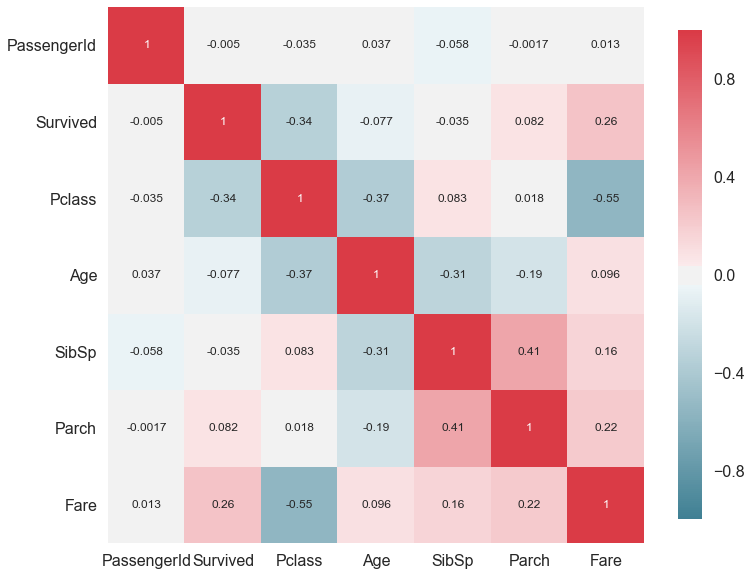

In [105]:
plot_correlation_map(df)

<h3><span style="color:#739A9E"> What is the male to female ratio?</span></h3>

In [106]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<h3><span style="color:#739A9E"> This is a visual representation of the comparison of men versus women on board.</span></h3>

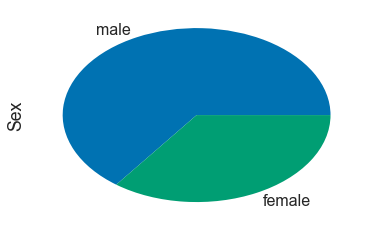

In [107]:
df.Sex.value_counts().plot(kind = 'pie')

In [108]:
df[df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<h3><span style="color:#739A9E"> All passengers have a 'Sex' assigned in this sample.</span></h3>

In [109]:
df[df.Sex== 'male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [110]:
df[df.Sex== 'female'].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

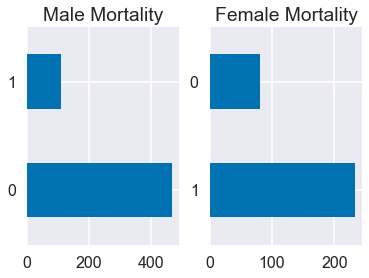

In [111]:
fig, axs = plt.subplots(1,2)
df[df.Sex== 'male'].Survived.value_counts().plot(kind= 'barh', ax = axs[0], title = 'Male Mortality')
df[df.Sex== 'female'].Survived.value_counts().plot(kind= 'barh', ax = axs[1], title = 'Female Mortality')

In [112]:
468/571.0

0.819614711033275

__ 82% of the males on board died __

In [113]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

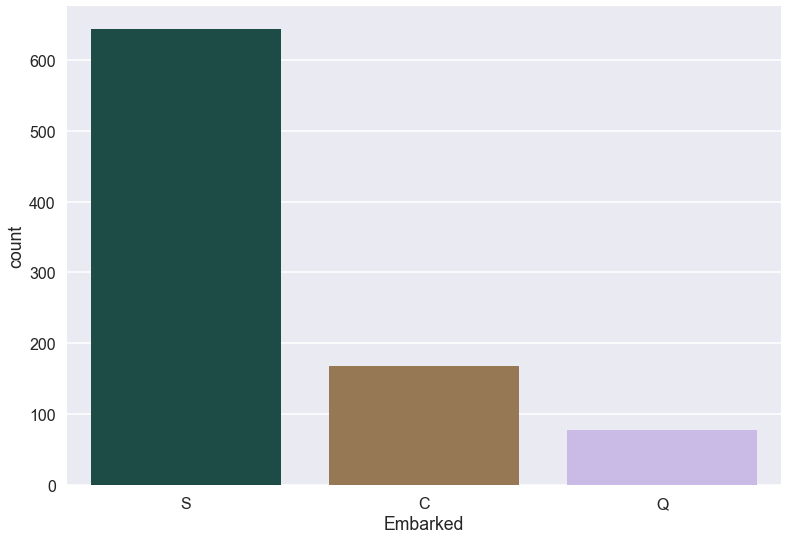

In [114]:
sns.set_context("poster")
sns.countplot(x="Embarked", data=df, palette="cubehelix");

In [115]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [116]:
df[df.Pclass.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [117]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<h3><center><span style = "color: #5BBA05;"> Wrangle data </span></center></h3>

In [118]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [119]:
##dean with NaN values in 'Age"
df.Age.mean()

29.69911764705882

In [120]:
guess_age = df.Age.mean()

In [121]:
df.Age = df.Age.fillna(value=guess_age)
print df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [122]:
df['Age'] = df['Age'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [123]:
print("Before", df.shape)

df = df.drop(['Ticket', 'Cabin', 'Name', 'Fare','PassengerId','SibSp', 'Parch' ], axis=1)

"After", df.shape

('Before', (891, 12))


('After', (891, 5))

In [124]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22,S
1,1,1,female,38,C
2,1,3,female,26,S
3,1,1,female,35,S
4,0,3,male,35,S


In [125]:
##Assigns a numerical value to the cat 'Sex'
df['Sex_num'] = df.Sex.map({'female':0, 'male':1})

In [126]:
##Compare the the old and new columns
df.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [127]:
##Create Function for correlation
def correlation(x,y):
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [128]:
print '*****PCLASS vs. SURVIVED*****'
print df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

*****PCLASS vs. SURVIVED*****
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [129]:
corr_pclass = correlation(df['Pclass'], df['Survived'])
print format(corr_pclass)

-0.338481035961


<h3><span style="color:#739A9E"> The Pearson's r between Pclass and Survived is -0.338481035961.

.</span></h3>

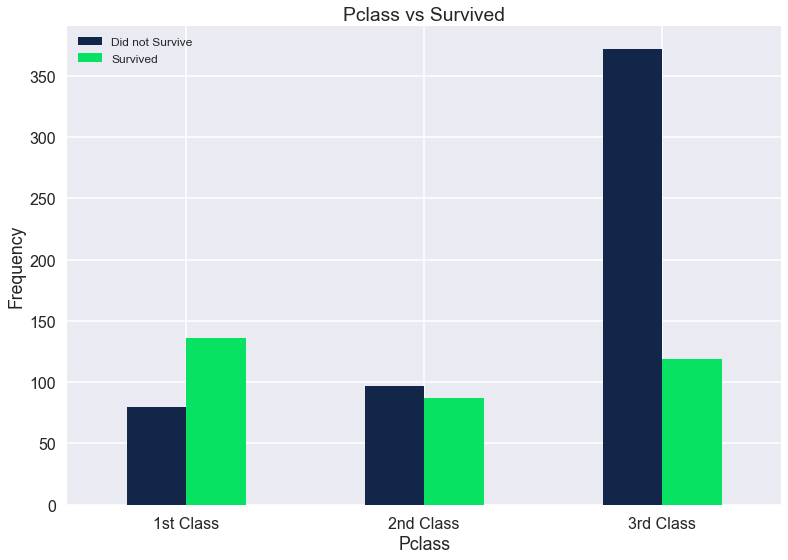

In [130]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', color=['#112649','#08e263'])
ax = plt.gca()
ax.set_xticklabels(('1st Class','2nd Class', '3rd Class'),rotation=0)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title("Pclass vs Survived")
plt.legend(('Did not Survive','Survived'),prop={'size': 12})

plt.show()

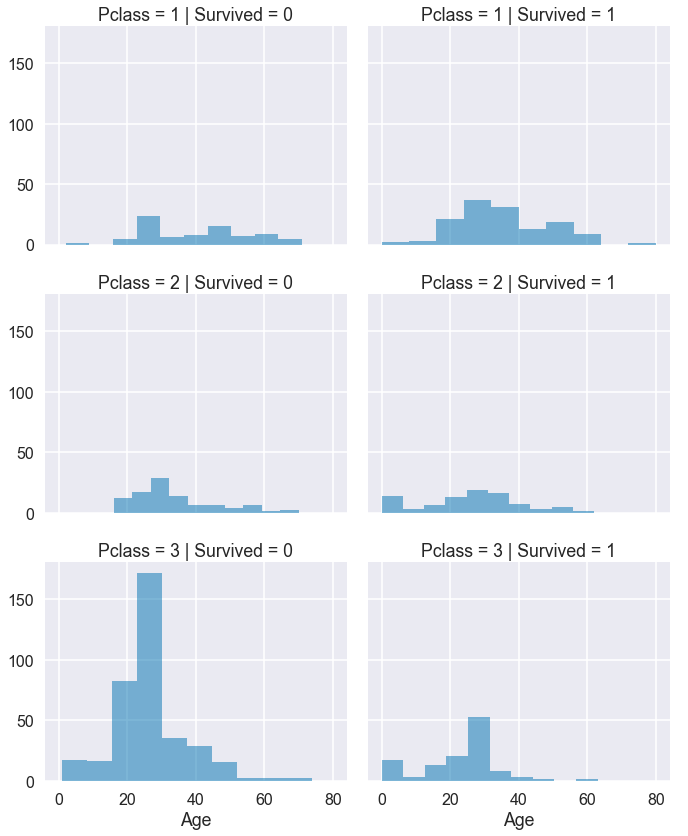

In [131]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=4.0, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();
sns.set_palette("hls");

In [132]:
df.Age.median()

29.0

<h3><span style="color:#739A9E"> This tells us that the youngest passenger was just over 4 month old while the oldest passenger was 80..</span></h3>

In [133]:
df.describe()

,Survived,Pclass,Age,Sex_num
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.647587
std,0.486592,0.836071,13.013778,0.477990
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,29.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


<h3><span style="color:#739A9E"> Again we see age having a direct link to survivability.</span></h3>

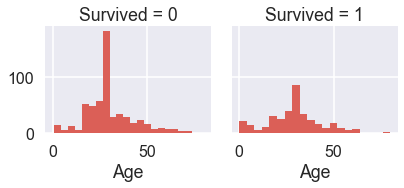

In [134]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<h3><span style="color:#739A9E"> This graphic displays that only once females reached 30+ years of age, did their odds of surviving drop.</span></h3>

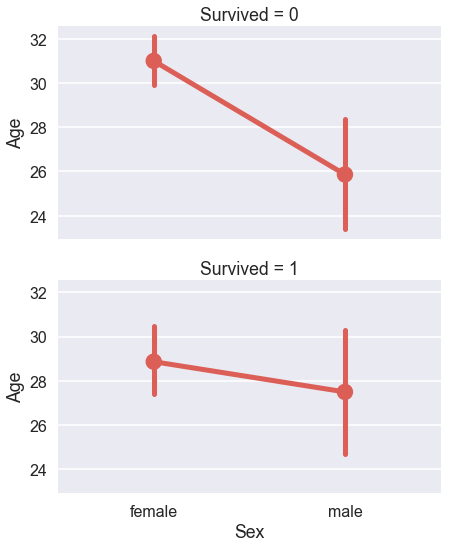

In [135]:
grid = sns.FacetGrid(df, row='Survived', size=4.0, aspect=1.6)
grid.map(sns.pointplot, 'Sex', 'Age')
grid.add_legend()

<h3><span style="color:#739A9E"> This graphic displays that males between the ages of 20-40 had the lowest survival rate.</span></h3>

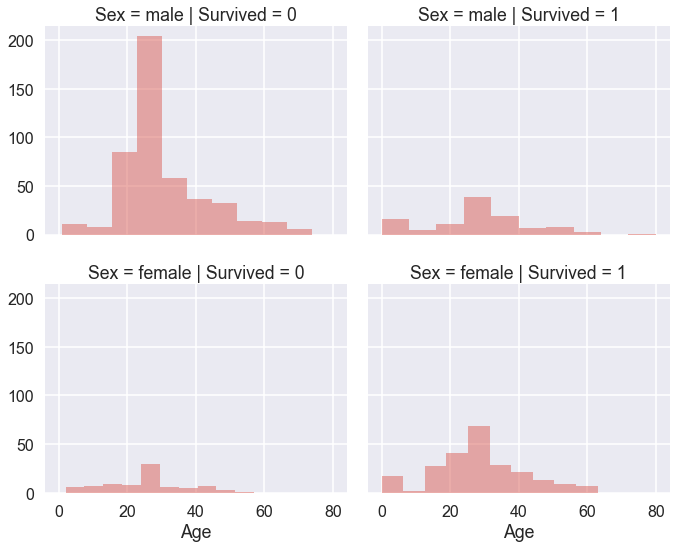

In [136]:
grid = sns.FacetGrid(df, col='Survived', row='Sex', size=4.0, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();
sns.set_palette("hls");

** Of those who died, it seems, based on these graphs, that most were below the mean age of 30**

<h3><span style="color:#739A9E"> Based on this sample data, almost 19% of males survived while 74% of females survived</span></h3>

In [137]:
print '*****Sex vs. SURVIVED*****'
print df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

*****Sex vs. SURVIVED*****
        Survived
Sex             
female  0.742038
male    0.188908


<h3><span style="color:#739A9E"> This graphic shows the striking difference between male and female survival rates</span></h3>

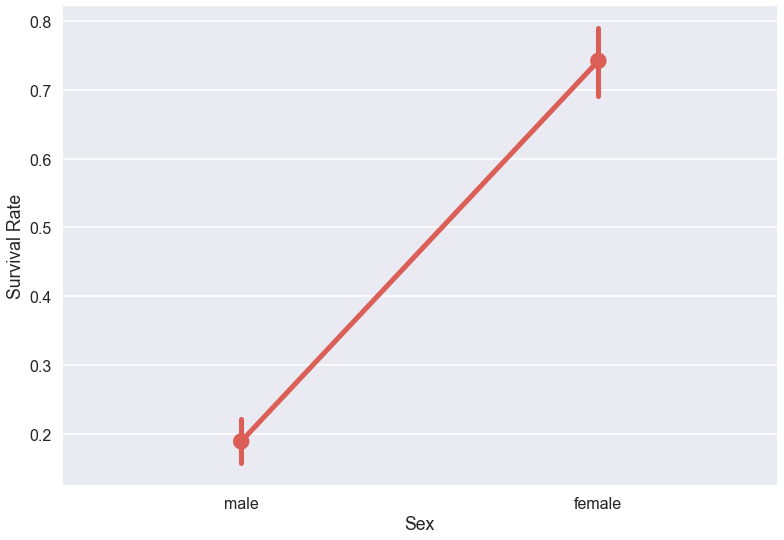

In [138]:
sns.pointplot(x='Sex', y='Survived', data=df);
plt.ylabel('Survival Rate')
plt.show()

<h3><span style="color:#739A9E"> Females seemed to have a much higher survival rate at any age.</span></h3>

<h2><center><span style="color:#3A5659"> FINAL FINDINGS </span><center></h2>

**These These findings are limited because the sampling is not a representation of the entire population. Instead it is a sampling. There is no way to find out if the sampling is biased in any way.**

Analysis of the data provided shows there is a strong correlation between survivability and socio-economic class, age, and sex. Younger, female passengers in Pclass 1 had the highest chance of survival. At all Pclass levels, women survived more often than men. Men of what we now consider middle age (26-32) had the lowest survival rate. 
